## Compute your own Word Embeddings - Anomalies and Curiosities of Medicine

In this notebook, we will compute the word embeddings using the fasttext library based on the book "Anomalies and Curiosities of Medicine by George M. Gould and Walter L. Pyle", published in 1896. The book is freely available as a txt file from project Guthenberg under this url: https://www.gutenberg.org/ebooks/747

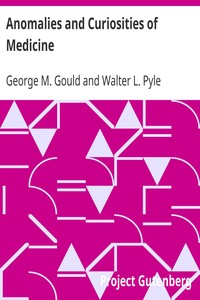

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

ModuleNotFoundError: No module named 'numpy'

### Reading the raw data
We start by reading the content of the book.

In [ ]:
book_file = open("./medicine.txt", "r", encoding="utf-8")
book = book_file.read()
book_file.close()

Let's look at the first few characters of the book.

In [ ]:
print(book[0:2500])

### Basic data cleaning

We can use the pattern to split the text into chapters. Also we check the length of the individual chapters, and discard the short ones that are mostly table of content and other non-core text parts.

In [ ]:
chapters_ = re.split("CHAPTER ", book)

To get an overview of the book, we print the first 200 characters of each chapter:

In [ ]:
[ chap[:200] for chap in chapters_ ]

In [ ]:
plt.plot([len(chapter) for chapter in chapters_])

In [ ]:
good_chapters = [chapter.replace('\n',' ') for chapter in chapters_[1:] if len(chapter)>2000]

In [ ]:
[ chap[:200] for chap in good_chapters ]

 ## Calculate the Embeddings

 ### Install and Import required libraries


In [ ]:
## uncomment the line below if the libraries are not available on your device:
!pip install gensim nltk

In [ ]:
import nltk
nltk.download('punkt_tab')

In [ ]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

### Tokenization
Now we are running the tokenization.

In [ ]:
tokenized_sentences = [word_tokenize(chapter.lower()) for chapter in good_chapters]

Let's look at the first 20 tokens of the first 2 sentences:

In [ ]:
[ sent[:20] for sent in tokenized_sentences[:2] ]

### Train FastText model
Now we are ready to train the fastText embedding model. We use dimension 50, a window size of 5, and go for a skipgram (as we have a rather small dataset):

In [ ]:
model = FastText(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, workers=4, sg=1)

### Access embeddings

In [ ]:
word_embeddings = model.wv
print(word_embeddings['blood'])

### Find similar words
Now we are ready to play around with the embeddings. For example, we can find the similar words to some words that we might find interesting:

In [ ]:
model.wv.most_similar('blood')

In [ ]:
model.wv.most_similar('food')

In [ ]:
model.wv.most_similar('body')

**Exercise:** Use the `dracula.txt` to generate word embeddings based on that book. Note that you might have to adapt some of the preprocessing steps, such as filtering out the parts that do not belong to the story itself. Compare the obtained results, e.g., the similar words to "blood".